# FRBs at $z=0$

In [1]:
%matplotlib notebook

In [2]:
# imports
from importlib import reload
import numpy as np

import seaborn as sns

from frb.dm import host as dm_host
from frb.dm import igm as dm_igm

/home/xavier/local/Python/ne2001/src/ne2001/density.py:173: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if integrator.__name__ is 'quad':


# Init

In [3]:
nFRB = 100000

# $\rm DM_{ISM}$

In [4]:
DM_ISM = 30.  # Effectively the minimum

# $\rm DM_{MW,halo}$

## Assume $\mathcal{U}(30,50)$

In [18]:
DM_MWh = 30. + 20*np.random.rand(nFRB)

<IPython.core.display.Javascript object>


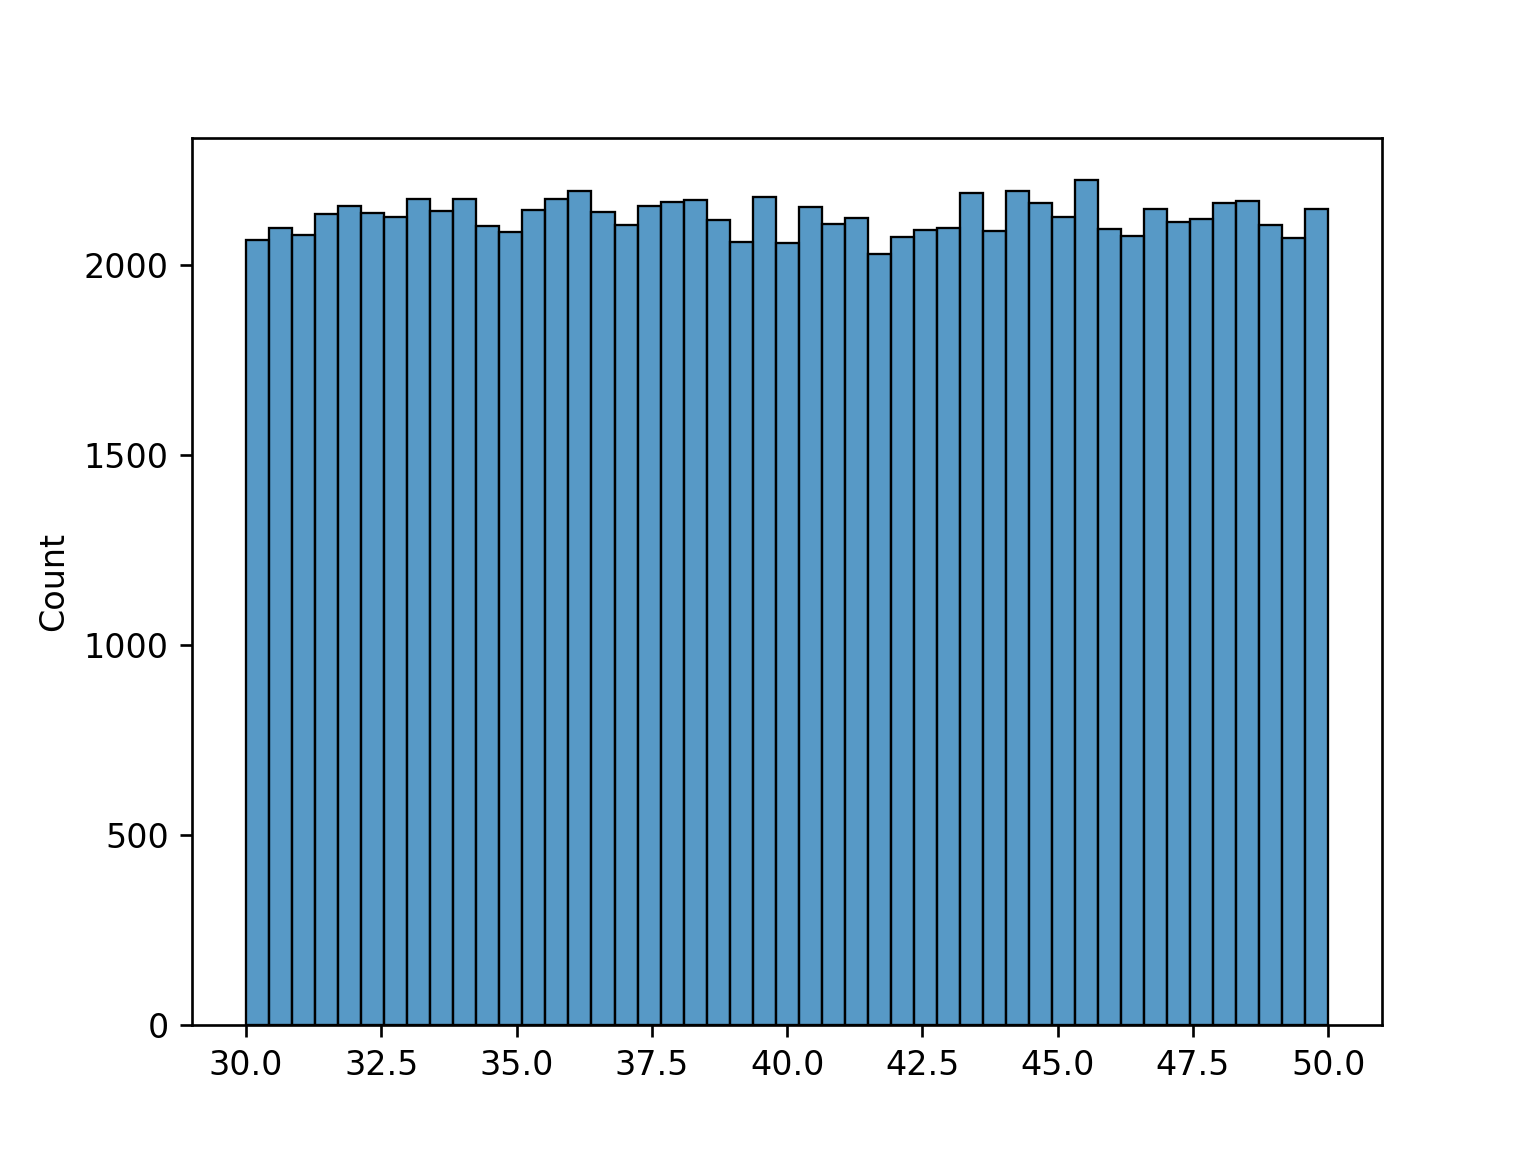

In [19]:
_ = sns.histplot(x=DM_MWh)

# $\rm DM_{host}$

## This bears the most uncertainty, by far..

## Our current approach has been to use a log-normal PDF.  Let's continue with that.

In [7]:
reload(dm_host)
DM_host = dm_host.rand_lognorm(nFRB)

<IPython.core.display.Javascript object>


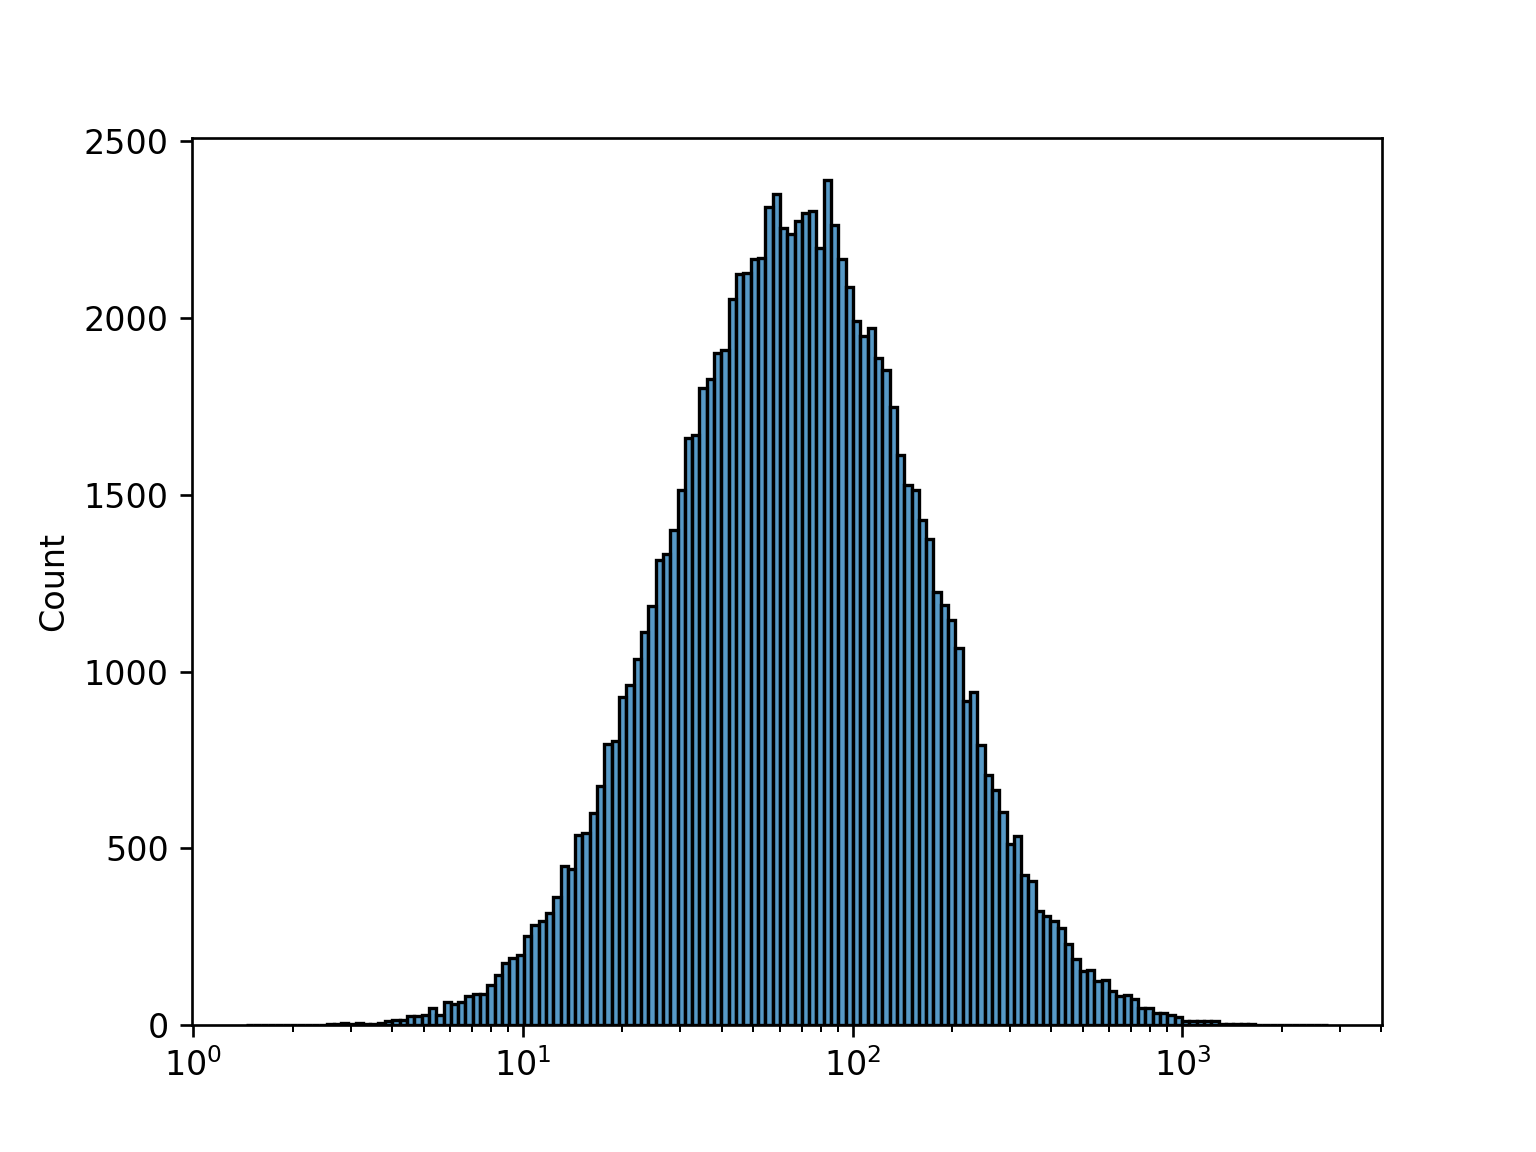

In [8]:
_ = sns.histplot(x=DM_host, log_scale=True)

# $\rm DM_{\rm cosmic}$

## For simplicity, let's go with 100 Mpc and assume 30% scatter

In [9]:
d = 100 # Mpc
H0 = 75 # km/s/Mpc
c = 3e5 # km/s
z = d * H0 / c
z

0.025

In [13]:
avg_DM_cosmic = dm_igm.average_DM(z).value # pc/cm**3
avg_DM_cosmic

20.58365258206522

In [16]:
DM_cosmic = avg_DM_cosmic + np.random.normal(size=nFRB)*(0.3*avg_DM_cosmic)

<IPython.core.display.Javascript object>


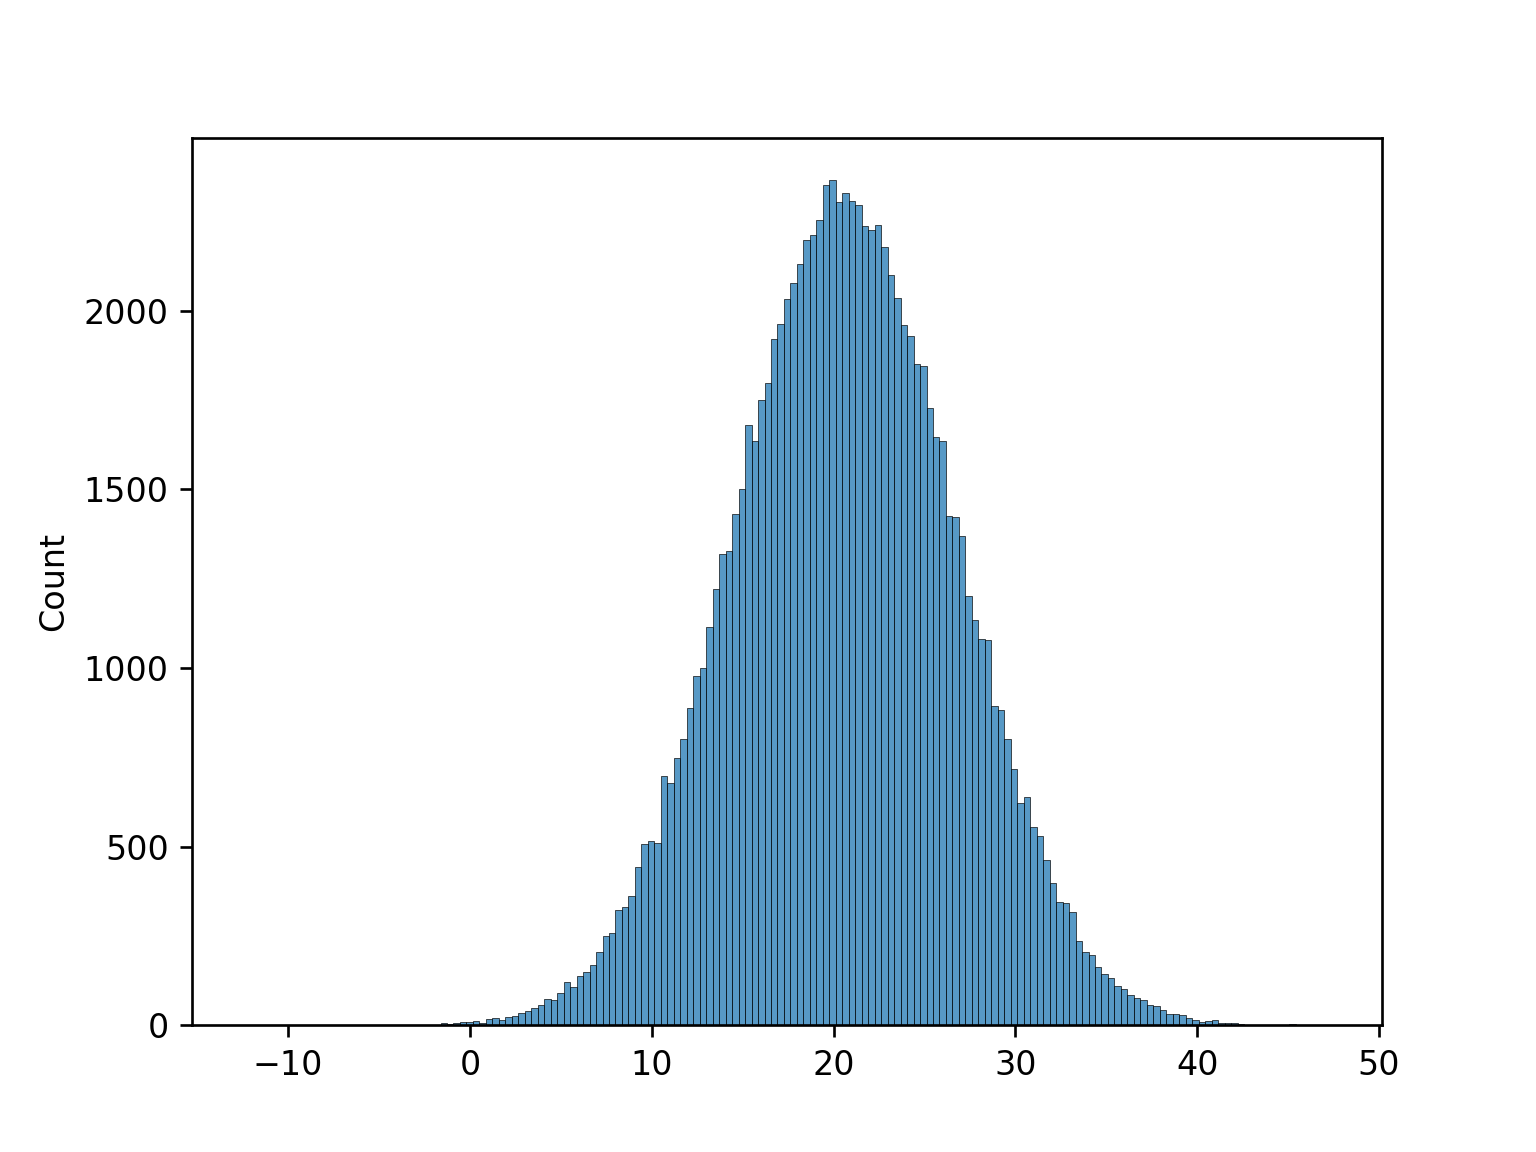

In [17]:
_ = sns.histplot(x=DM_cosmic)

# All set -- MCMC time

In [21]:
DM_FRB = DM_ISM + DM_MWh + DM_host + DM_cosmic

<IPython.core.display.Javascript object>


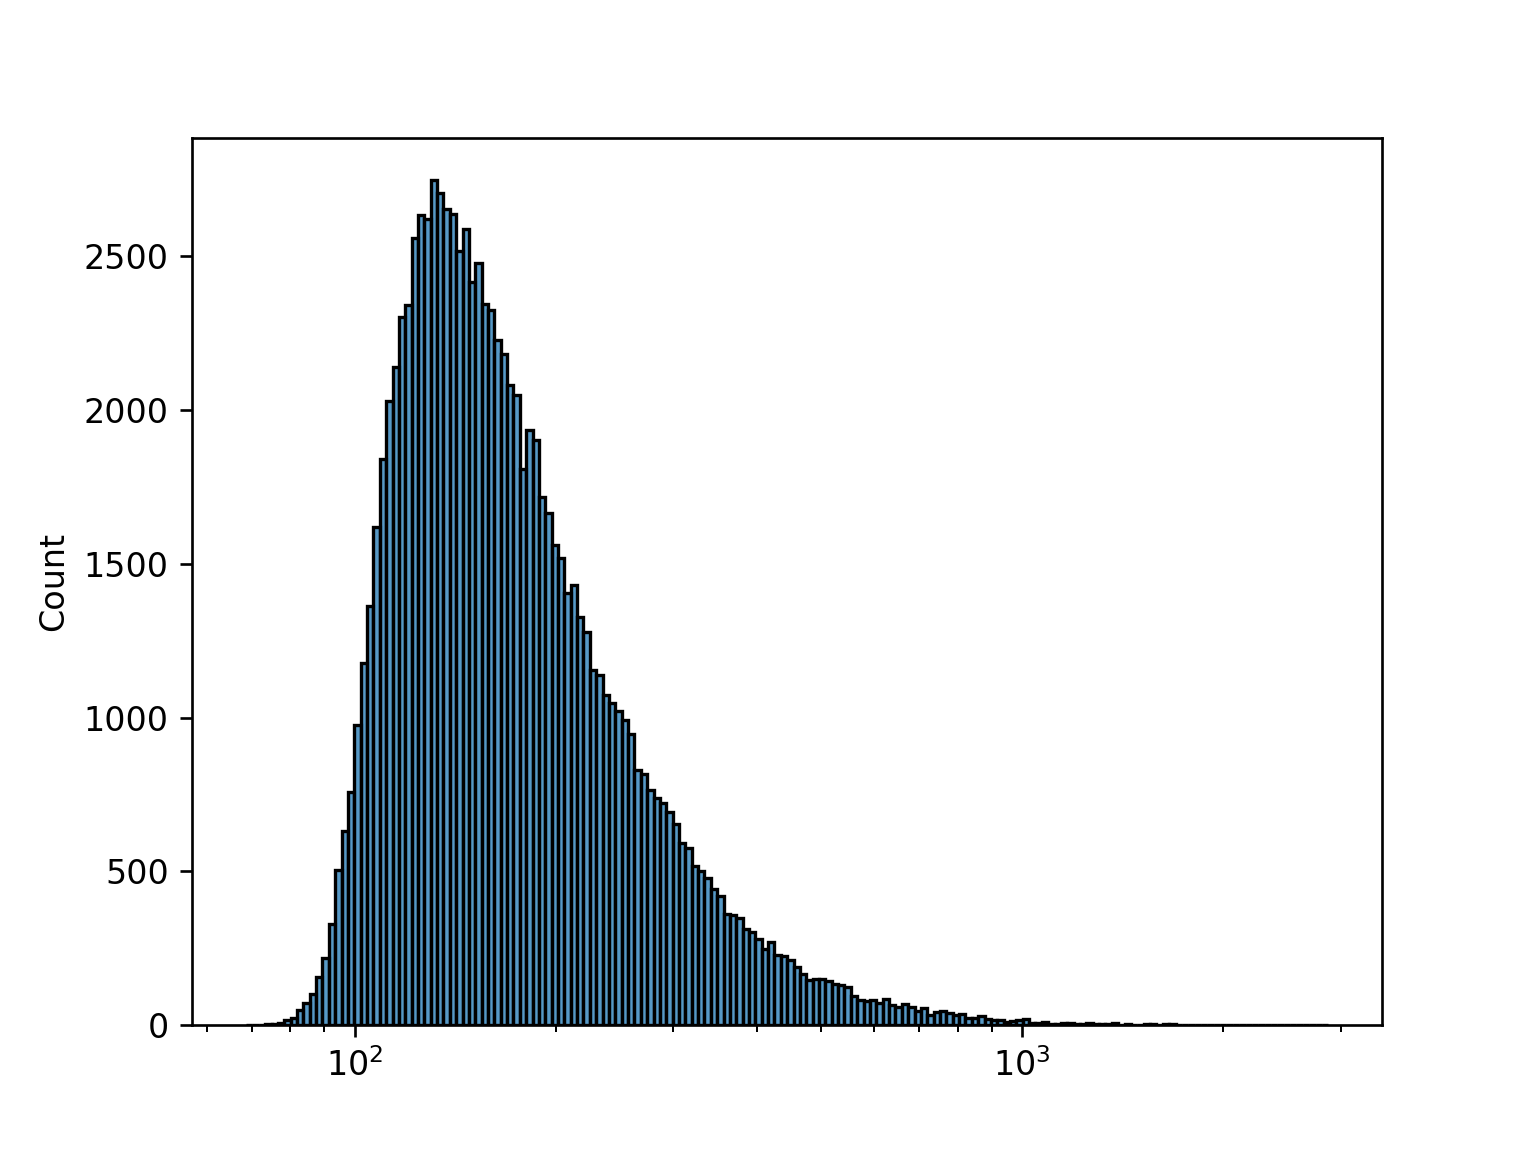

In [23]:
_ = sns.histplot(x=DM_FRB, log_scale=True)

In [25]:
np.percentile(DM_FRB, 90)

299.9643410577475